El paquete de _Python_ [scikit-learn](http://scikit-learn.org) (_sklearn_ en lo que sigue) proporciona un marco de trabajo para el aprendizaje automático.

# Aprendizaje supervisado

Para ilustrar el concepto de aprendizaje supervisado vamos a usar el conjunto de datos [_Car Evaluation_](http://archive.ics.uci.edu/ml/datasets/Car+Evaluation) del repositorio [UCI](http://archive.ics.uci.edu/ml/). Este conjunto de datos contiene información acerca de la idoneidad de una serie de coches, en función de los siguientes atributos discretos:
* _buying_: precio de compra. Posibles valores: `vhigh`, `high`, `med`, `low`.
* _maint_: coste de mantenimiento. Posibles valores: `vhigh`, `high`, `med`, `low`.
* _doors_: número de puertas. Posibles valores: `2`, `3`, `4`, `5more`.
* _persons_: número de asientos. Posibles valores: `2`, `4`, `more`.
* _lug\_boot_: tamaño del maletero. Posibles valores: `small`, `med`, `big`.
* _safety_: nivel de seguridad estimada. Posibles valores: `low`, `med`, `high`.

La idoneidad de cada coche se indica mediante el atributo _acceptability_, que los clasifica como `unacc`, `acc`, `good` o `vgood`.

Para leer los datos desde el fichero `cars.csv` que se proporciona se pueden evaluar las siguientes expresiones ([_Pandas_](http://pandas.pydata.org/) y [_NumPy_](http://www.numpy.org/) son paquetes de _Python_ para análisis de datos y cálculo científico, respectivamente):

In [1]:
import pandas
import numpy

In [2]:
cars = pandas.read_csv('cars.csv', header=None,
                       names=['buying', 'maint', 'doors', 'persons',
                              'lug_boot', 'safety', 'acceptability'])

In [3]:
# Número de filas y columnas
print(cars.shape)

(1728, 7)


In [4]:
# 10 primeras filas
cars.head(10)

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


_sklearn_ no puede trabajar directamente con el conjunto de datos anterior, ya que asume que los valores de las variables discretas están codificadas con números enteros. Para transformar los datos a un formato adecuado ofrece diversas operaciones de preprocesamiento, entre las que se encuentran `OrdinalEncoder`, para codificar los atributos, y `LabelEncoder`, para codificar la variable objetivo.

In [5]:
from sklearn import preprocessing

In [7]:
atributos = cars.loc[:, 'buying':'safety']  # selección de las columnas de atributos
objetivo = cars['acceptability']  # selección de la columna objetivo

In [8]:
# Para realizar una codificación de los datos, se crea una instancia del tipo de
# codificación pretendida y se ajusta a los datos disponibles mediante el método fit.

# El codificador adecuado para los atributos es OrdinalEncoder, ya que permite
# trabajar con el array completo de valores de los atributos.
codificador_atributos = preprocessing.OrdinalEncoder()
codificador_atributos.fit(atributos)

# Categorías detectadas por el codificador para cada atributo
print(codificador_atributos.categories_)

[array(['high', 'low', 'med', 'vhigh'], dtype=object), array(['high', 'low', 'med', 'vhigh'], dtype=object), array(['2', '3', '4', '5more'], dtype=object), array(['2', '4', 'more'], dtype=object), array(['big', 'med', 'small'], dtype=object), array(['high', 'low', 'med'], dtype=object)]


In [9]:
# Una vez ajustado el codificador, el método transform permite codificar los
# valores de los atributos
atributos_codificados = codificador_atributos.transform(atributos)
print(atributos_codificados)

[[3. 3. 0. 0. 2. 1.]
 [3. 3. 0. 0. 2. 2.]
 [3. 3. 0. 0. 2. 0.]
 ...
 [1. 1. 3. 2. 0. 1.]
 [1. 1. 3. 2. 0. 2.]
 [1. 1. 3. 2. 0. 0.]]


In [10]:
# El método inverse_transform permite descodificar los valores de los atributos
print(codificador_atributos.inverse_transform([[3., 3., 0., 0., 2., 1.],
                                               [1., 1., 3., 2., 0., 1.]]))

[['vhigh' 'vhigh' '2' '2' 'small' 'low']
 ['low' 'low' '5more' 'more' 'big' 'low']]


In [11]:
# El codificador adecuado para la variable objetivo es LabelEncoder, que trabaja
# con una lista o array unidimensional de sus valores
codificador_objetivo = preprocessing.LabelEncoder()

# El método fit_transform ajusta la codificación y la aplica a los datos justo
# a continuación
objetivo_codificado = codificador_objetivo.fit_transform(objetivo)

In [11]:
# Clases detectadas por el codificador para la variable objetivo
print(codificador_objetivo.classes_)

['acc' 'good' 'unacc' 'vgood']


In [12]:
print(objetivo_codificado)

[2 2 2 ... 2 1 3]


In [13]:
# Las respuestas predichas por los modelos estarán codificadas, pero el codificador
# también permite descodificarlas
print(codificador_objetivo.inverse_transform([2, 1, 3]))

['unacc' 'good' 'vgood']


Una vez codificadas las variables, es necesario separar el conjunto de datos en dos: un conjunto de entrenamiento, que se usará para construir los distintos modelos; y un conjunto de prueba, que se usará para comparar los distintos modelos.

Un detalle a tener en cuenta es que la distribución de ejemplos en las distintas clases de aceptabilidad no es uniforme: hay 1210 coches (un 70.023&nbsp;% del total) clasificados como inaceptables (`unacc`), 384 coches (22.222&nbsp;%) clasificados como aceptables (`acc`), 69 coches (3.993&nbsp;%) clasificados como buenos (`good`) y 65 coches (3.762&nbsp;%) clasificados como muy buenos (`vgood`).

In [14]:
# Cantidad total de ejemplos
print(cars.shape[0])

1728


In [15]:
# Frecuencia total de cada clase de aceptabilidad
print(pandas.Series(objetivo).value_counts(normalize=True))

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: acceptability, dtype: float64


Es conveniente, por tanto, que la separación de los ejemplos se realice de manera estratificada, es decir, intentando mantener la proporción anterior tanto en el conjunto de entrenamiento como en el de prueba.

Para dividir un conjunto de datos en un subconjunto de entrenamiento y otro de prueba, _sklearn_ proporciona la función `train_test_split`.

In [12]:
from sklearn import model_selection

In [13]:
(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = model_selection.train_test_split(
        # Conjuntos de datos a dividir, usando los mismos índices para ambos
        atributos_codificados, objetivo_codificado,
        # Valor de la semilla aleatoria, para que el muestreo sea reproducible,
        # a pesar de ser aleatorio
        random_state=12345,
        # Tamaño del conjunto de prueba
        test_size=.33,
        # Estratificamos respecto a la distribución de valores en la variable objetivo
        stratify=objetivo_codificado)

In [14]:
# Comprobamos que el conjunto de prueba contiene el 33 % de los datos, en la misma proporción
# con respecto a la variable objetivo
print('Cantidad de ejemplos de pruebas requeridos:', 1728 * .33)
print('Filas del array de atributos de prueba:', atributos_prueba.shape[0])
print('Longitud del vector de objetivos de prueba:', len(objetivo_prueba))
print('Proporción de clases en el vector de objetivos de prueba:')
print(pandas.Series(
        codificador_objetivo.inverse_transform(objetivo_prueba)
      ).value_counts(normalize=True))

Cantidad de ejemplos de pruebas requeridos: 570.24
Filas del array de atributos de prueba: 571
Longitud del vector de objetivos de prueba: 571
Proporción de clases en el vector de objetivos de prueba:
unacc    0.700525
acc      0.222417
good     0.040280
vgood    0.036778
dtype: float64


In [19]:
# Comprobamos que el conjunto de entrenamiento contiene el resto de los datos, en la misma
# proporción con respecto a la variable objetivo
print('Cantidad de ejemplos de entrenamiento requeridos:', 1728 * .67)
print('Filas del array de atributos de entrenamiento:', atributos_entrenamiento.shape[0])
print('Longitud del vector de objetivos de entrenamiento:', len(objetivo_entrenamiento))
print('Proporción de clases en el vector de objetivos de entrenamiento:')
print(pandas.Series(
        codificador_objetivo.inverse_transform(objetivo_entrenamiento)
      ).value_counts(normalize=True))

Cantidad de ejemplos de entrenamiento requeridos: 1157.76
Filas del array de atributos de entrenamiento: 1157
Longitud del vector de objetivos de entrenamiento: 1157
Proporción de clases en el vector de objetivos de entrenamiento:
unacc    0.700086
acc      0.222126
good     0.039758
vgood    0.038029
dtype: float64


Para realizar aprendizaje supervisado en _sklearn_, basta crear una instancia de la clase de objetos que implemente el modelo que se quiera utilizar (_naive_ Bayes, árboles de decisión, _kNN_, etc.).

Cada una de estas instancias dispondrá de los siguientes métodos:
* El método `fit` permite entrenar el modelo, dados __por separado__ el conjunto de ejemplos de entrenamiento y la clase de cada uno de estos ejemplos.
* El método `predict` permite clasificar un nuevo ejemplo una vez entrenado el modelo.
* El método `score` calcula el rendimiento del modelo, dados __por separado__ el conjunto de ejemplos de prueba y la clase de cada uno de estos ejemplos.

### _Naive_ Bayes

_sklearn_ implementa _naive_ Bayes para atributos categóricos mediante instancias de la clase `CategoricalNB`.

In [20]:
from sklearn import naive_bayes

In [21]:
clasif_NB = naive_bayes.CategoricalNB(alpha=1.0)  # alpha es el parámetro de suavizado
clasif_NB.fit(atributos_entrenamiento, objetivo_entrenamiento)

CategoricalNB()

Las siguientes expresiones muestran las cuentas realizadas y (los logaritmos de) las probabilidades aprendidas por el modelo.

In [22]:
for clase, cantidad_ejemplos_clase, log_probabilidad_clase in zip(
    codificador_objetivo.classes_, clasif_NB.class_count_, clasif_NB.class_log_prior_):
        print(f'Cantidad de ejemplos para la clase {clase}: {cantidad_ejemplos_clase}')
        print(f'Logaritmo de la probabilidad aprendida para la clase {clase}: {log_probabilidad_clase}')

Cantidad de ejemplos para la clase acc: 257.0
Logaritmo de la probabilidad aprendida para la clase acc: -1.5045096422984567
Cantidad de ejemplos para la clase good: 46.0
Logaritmo de la probabilidad aprendida para la clase good: -3.2249443307045818
Cantidad de ejemplos para la clase unacc: 810.0
Logaritmo de la probabilidad aprendida para la clase unacc: -0.3565514795271927
Cantidad de ejemplos para la clase vgood: 44.0
Logaritmo de la probabilidad aprendida para la clase vgood: -3.269396093275416


In [23]:
for i, atributo in enumerate(codificador_atributos.feature_names_in_):
    print(f'Cantidad de ejemplos para el atributo {atributo}:')
    print(pandas.DataFrame(clasif_NB.category_count_[i],
                          columns=codificador_atributos.categories_[i],
                          index=codificador_objetivo.classes_))
    print(f'Logaritmos de las probabilidades aprendidas para el atributo {atributo}:')
    print(pandas.DataFrame(clasif_NB.feature_log_prob_[i],
                          columns=codificador_atributos.categories_[i],
                          index=codificador_objetivo.classes_))
    print()

Cantidad de ejemplos para el atributo buying:
        high    low    med  vhigh
acc     69.0   64.0   70.0   54.0
good     0.0   29.0   17.0    0.0
unacc  230.0  177.0  174.0  229.0
vgood    0.0   26.0   18.0    0.0
Logaritmos de las probabilidades aprendidas para el atributo buying:
           high       low       med     vhigh
acc   -1.316025 -1.390133 -1.301841 -1.557187
good  -3.912023 -0.510826 -1.021651 -3.912023
unacc -1.259543 -1.520177 -1.537174 -1.263881
vgood -3.871201 -0.575364 -0.926762 -3.871201

Cantidad de ejemplos para el atributo maint:
        high    low    med  vhigh
acc     62.0   65.0   78.0   52.0
good     0.0   33.0   13.0    0.0
unacc  205.0  186.0  174.0  245.0
vgood   12.0   17.0   15.0    0.0
Logaritmos de las probabilidades aprendidas para el atributo maint:
           high       low       med     vhigh
acc   -1.421386 -1.374866 -1.195073 -1.594228
good  -3.912023 -0.385662 -1.272966 -3.912023
unacc -1.374084 -1.470852 -1.537174 -1.196629
vgood -1.306252 -

El método `predict` devuelve la clase predicha por el modelo para un nuevo ejemplo y el método `score` la tasa de acierto (_accuracy_) sobre un conjunto de datos de prueba.

In [24]:
nuevos_ejemplos = pandas.DataFrame([['vhigh', 'vhigh', '3', 'more', 'big', 'high'],
                                    ['high', 'low', '3', '2', 'med', 'med']],
                                   columns=codificador_atributos.feature_names_in_)
nuevos_ejemplos

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,3,more,big,high
1,high,low,3,2,med,med


In [25]:
predicciones = clasif_NB.predict(codificador_atributos.transform(nuevos_ejemplos))
codificador_objetivo.inverse_transform(predicciones)

array(['unacc', 'unacc'], dtype=object)

In [26]:
clasif_NB.score(atributos_prueba, objetivo_prueba)

0.8441330998248686

### Árboles de decisión

_sklearn_ implementa los árboles de decisión clasificadores como instancias de la clase `DecisionTreeClassifier`.

In [27]:
from sklearn import tree

In [28]:
# Scikit-learn implementa el algoritmo CART de tal manera que, al buscar en cada nodo la mejor
# combinación atributo-umbral para dividir el conjunto de ejemplos asociado al nodo, no considera
# los atributos en orden, sino que los reordena aleatoriamente. Esto puede hacer que se obtenga
# un árbol distinto cada vez que se ejecuta el código, ya que produce como efecto que los empates
# en esa búsqueda se deshacen de forma aleatoria.

# Para evitar el sobreajuste del árbol a los ejemplos de entrenamiento vamos a limitar la
# profundidad del árbol

clasif_CART = tree.DecisionTreeClassifier(
    max_depth=5,  # máxima profundidad del árbol
    random_state=54321  # semilla aleatoria, para que el código sea reproducible
)
clasif_CART.fit(atributos_entrenamiento, objetivo_entrenamiento)

DecisionTreeClassifier(max_depth=5, random_state=54321)

In [29]:
from matplotlib import pyplot

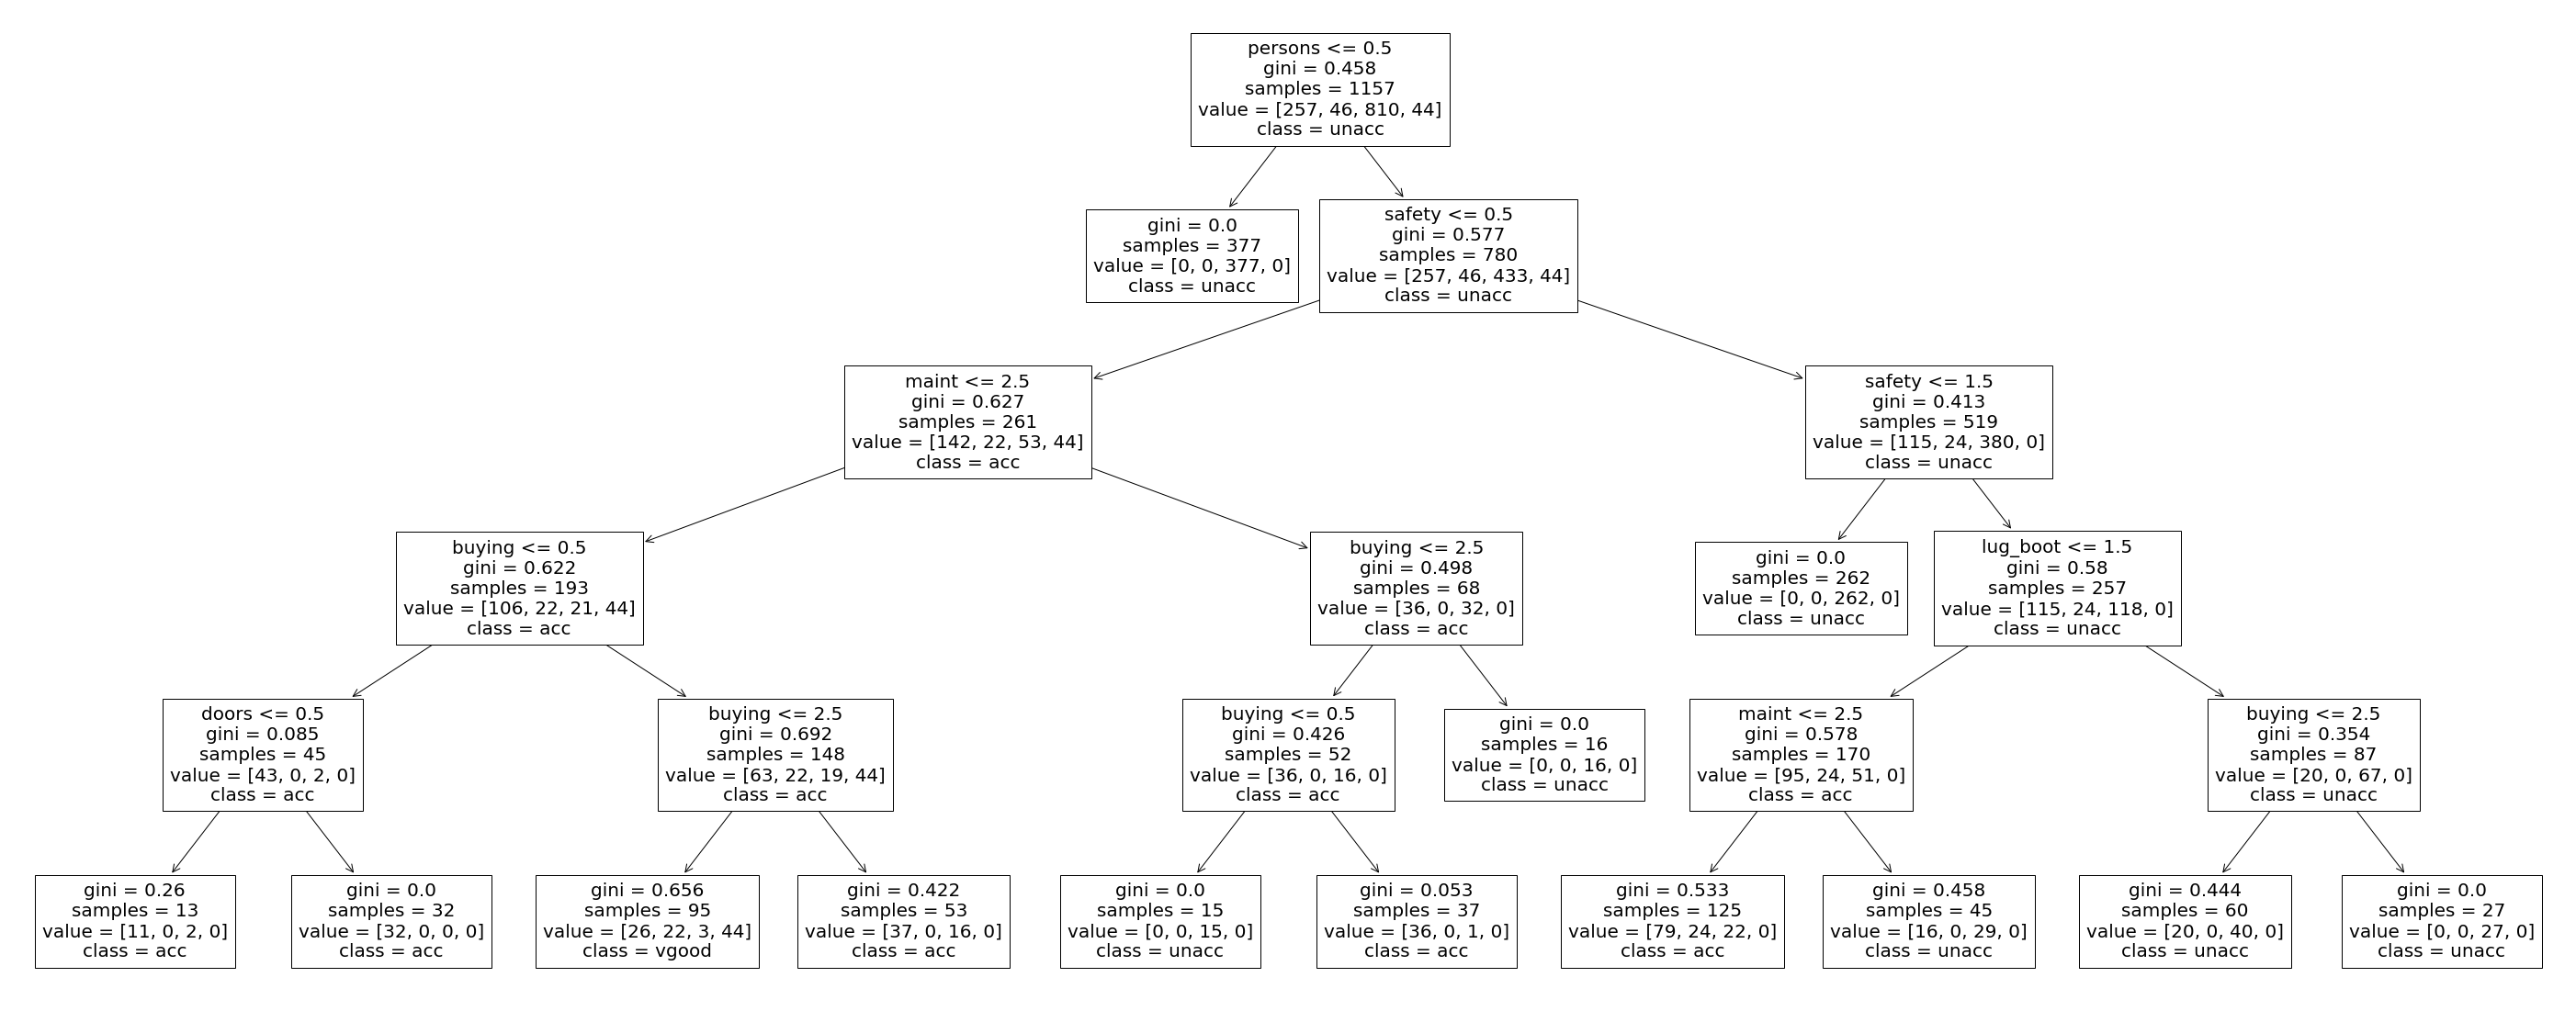

In [30]:
pyplot.figure(figsize=(50, 20))  # Anchura y altura del gráfico
árbol = tree.plot_tree(clasif_CART,
                       feature_names=codificador_atributos.feature_names_in_,
                       class_names=codificador_objetivo.classes_)

El método `predict` devuelve la clase predicha por el modelo para un nuevo ejemplo y el método `score` la tasa de acierto (_accuracy_) sobre un conjunto de datos de prueba.

In [31]:
predicciones = clasif_CART.predict(codificador_atributos.transform(nuevos_ejemplos))
codificador_objetivo.inverse_transform(predicciones)

array(['unacc', 'unacc'], dtype=object)

In [32]:
clasif_CART.score(atributos_prueba, objetivo_prueba)

0.8388791593695272

### kNN

_sklearn_ implementa un modelo _kNN_ clasificador como una instancia de la clase `KNeighborsClassifier`. En https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html se puede encontrar una descripción de las distancias actualmente implementadas que se podrían usar.

In [33]:
from sklearn import neighbors

In [34]:
clasif_kNN = neighbors.KNeighborsClassifier(
    n_neighbors=5,  # Número de vecinos a considerar
    metric='hamming'  # Distancia de Hamming como métrica de cercanía:
                      # fracción de atributos con valores distintos
)
clasif_kNN.fit(atributos_entrenamiento, objetivo_entrenamiento)

KNeighborsClassifier(metric='hamming')

El método `kneighbors` permite encontrar los (índices de los) $k$ vecinos más cercanos de los ejemplos proporcionados, así como las distancias a las que se encuentran.

In [35]:
distancias, vecinos = clasif_kNN.kneighbors(codificador_atributos.transform(nuevos_ejemplos))

In [36]:
# Vecinos más cercanos y distancia a ellos del primer ejemplo nuevo
print("Primer ejemplo nuevo:")
print(nuevos_ejemplos.iloc[[0]])
print()
print("5 vecinos más cercanos:")
print(pandas.DataFrame(codificador_atributos.inverse_transform(atributos_entrenamiento[vecinos[0]]),
                       columns=codificador_atributos.feature_names_in_,
                       index=vecinos[0]).assign(
    distancia=distancias[0],
    clase=codificador_objetivo.inverse_transform(objetivo_entrenamiento[vecinos[0]])
))

Primer ejemplo nuevo:
  buying  maint doors persons lug_boot safety
0  vhigh  vhigh     3    more      big   high

5 vecinos más cercanos:
    buying  maint doors persons lug_boot safety  distancia  clase
608   high  vhigh     3    more      big   high   0.166667  unacc
60   vhigh    med     3    more      big   high   0.166667    acc
776    med  vhigh     3    more      big   high   0.166667    acc
653    low  vhigh     3    more      big   high   0.166667    acc
925  vhigh    low     3    more      big   high   0.166667    acc


In [37]:
# Vecinos más cercanos y distancia a ellos del segundo ejemplo nuevo
print("Segundo ejemplo nuevo:")
print(nuevos_ejemplos.iloc[[1]])
print()
print("5 vecinos más cercanos:")
print(pandas.DataFrame(codificador_atributos.inverse_transform(atributos_entrenamiento[vecinos[1]]),
                       columns=codificador_atributos.feature_names_in_,
                       index=vecinos[1]).assign(
    distancia=distancias[1],
    clase=codificador_objetivo.inverse_transform(objetivo_entrenamiento[vecinos[1]])
))

Segundo ejemplo nuevo:
  buying maint doors persons lug_boot safety
1   high   low     3       2      med    med

5 vecinos más cercanos:
    buying maint doors persons lug_boot safety  distancia  clase
238   high   low     3       2      med    med   0.000000  unacc
603   high   low     3       2      med   high   0.166667  unacc
589   high   low     3       2      big    med   0.166667  unacc
71     low   low     3       2      med    med   0.166667  unacc
188   high   low     3       2      med    low   0.166667  unacc


El método `predict` devuelve la clase predicha por el modelo para un nuevo ejemplo y el método `score` la tasa de aciertos (_accuracy_) sobre un conjunto de datos de prueba.

In [38]:
predicciones = clasif_kNN.predict(codificador_atributos.transform(nuevos_ejemplos))
codificador_objetivo.inverse_transform(predicciones)

array(['acc', 'unacc'], dtype=object)

In [39]:
clasif_kNN.score(atributos_prueba, objetivo_prueba)

0.8914185639229422

## Solicitudes de admisión en guarderías

El fichero de datos `nursery.csv` proporciona un conjunto de datos acerca de la evaluación de solicitudes de admisión en guarderías, en función de los siguientes atributos discretos:
* _parents_, con posibles valores: `usual`, `pretentious`, `great_pret`.
* _has\_nurs_, con posibles valores: `proper`, `less_proper`, `improper`, `critical`, `very_crit`.
* _form_, con posibles valores: `complete`, `completed`, `incomplete`, `foster`.
* _children_, con posibles valores: `1`, `2`, `3`, `more`.
* _housing_, con posibles valores: `convenient`, `less_conv`, `critical`.
* _finance_, con posibles valores: `convenient`, `inconv`.
* _social_, con posibles valores: `non-prob`, `slightly_prob`, `problematic`.
* _health_, con posibles valores: `recommended`, `priority`, `not_recom`.

Los datos provienen de un sistema experto de decisión usado durante varios años de la década de los 80 en Liubliana (Eslovenia), que se desarrolló para poder proporcionar una explicación objetiva a las solicitudes rechazadas.

La evaluación de cada solicitud se indica mediante el atributo _evaluation_, que los clasifica como `not_recom`, `recommend`, `very_recom`, `priority` o `spec_prior`.

El objetivo es aprender a partir de los datos un modelo que prediga de la mejor forma posible cómo se evaluará una solicitud de admisión a partir de los valores de los atributos anteriores. Para ello se pide seguir los siguientes pasos:

* Leer los datos a partir del fichero `nursery.csv`.

In [8]:
import pandas
import numpy
nursery = pandas.read_csv('nursery.csv', header=None,
                       names=['parents', 'has_nurs', 'form', 'children',
                              'housing', 'finance', 'social', 'health', 'evaluation'])
print(nursery.shape)
nursery.head(9)

(12958, 9)


,parents,has_nurs,form,children,housing,finance,social,health,evaluation
0,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
1,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
2,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
3,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
4,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
5,usual,proper,complete,1,convenient,convenient,problematic,priority,priority
6,usual,proper,complete,1,convenient,convenient,problematic,not_recom,not_recom
7,usual,proper,complete,1,convenient,inconv,nonprob,recommended,very_recom
8,usual,proper,complete,1,convenient,inconv,nonprob,priority,priority


* Codificar los datos con números enteros.

Vamos a usar el paquete sklearn, que como input espera recibir los atributos discretos transformados en números enteros.

In [14]:
from sklearn import preprocessing
atributos = nursery.loc[:, 'parents':'health']  # selección de las columnas de atributos
objetivo = nursery['evaluation']  # selección de la columna objetivo

#Primero lo hacemos con los atributos
codificador_atributos = preprocessing.OrdinalEncoder()#se crea primero una instancia con el modelo a seguir
codificador_atributos.fit(atributos)#se ajusta linealmente a los datos
atributos_codificados = codificador_atributos.transform(atributos)
print(atributos_codificados)


[[2. 3. 0. ... 0. 0. 1.]
 [2. 3. 0. ... 0. 0. 0.]
 [2. 3. 0. ... 0. 2. 1.]
 ...
 [0. 4. 2. ... 1. 1. 2.]
 [0. 4. 2. ... 1. 1. 1.]
 [0. 4. 2. ... 1. 1. 0.]]


In [15]:
#Después con el objetivo
codificador_objetivo = preprocessing.LabelEncoder()
objetivo_codificado = codificador_objetivo.fit_transform(objetivo)
print(objetivo_codificado)

[1 0 1 ... 2 2 0]


* Dividir el conjunto de datos en un subconjunto de entrenamiento (80&nbsp;% de los datos) y un subconjunto de prueba (20&nbsp;% de los datos). El primero de ellos se utilizará tanto para seleccionar un tipo de modelo utilizando la técnica de validación cruzada, como para entrenar el modelo finalmente seleccionado. El segundo se utilizará para medir la capacidad de generalización de este último.

In [18]:
# Frecuencia total de cada clase de evaluation
print(pandas.Series(objetivo).value_counts(normalize=True))

from sklearn import model_selection

not_recom     0.333385
priority      0.329217
spec_prior    0.312085
very_recom    0.025313
Name: evaluation, dtype: float64


In [44]:
(atributos_entrenamiento, atributos_prueba,
 objetivo_entrenamiento, objetivo_prueba) = model_selection.train_test_split(
        # Conjuntos de datos a dividir ya codificados
        atributos_codificados, objetivo_codificado,
        # Valor de la semilla aleatoria, para que el muestreo sea reproducible,
        # a pesar de ser aleatorio
        random_state=67345,
        # Tamaño del conjunto de prueba
        test_size=.20,
        # Estratificamos respecto a la distribución de valores en la variable objetivo
        stratify=objetivo_codificado)


print('Cantidad de ejemplos de pruebas requeridos:', 12958 * .20)
print('Filas del array de atributos de prueba:', atributos_prueba.shape[0])
print('Longitud del vector de objetivos de prueba:', len(objetivo_prueba))
print('Proporción de clases en el vector de objetivos de prueba:')
print(pandas.Series(
        codificador_objetivo.inverse_transform(objetivo_prueba)
      ).value_counts(normalize=True))

Cantidad de ejemplos de pruebas requeridos: 2591.6000000000004
Filas del array de atributos de prueba: 2592
Longitud del vector de objetivos de prueba: 2592
Proporción de clases en el vector de objetivos de prueba:
not_recom     0.333333
priority      0.329090
spec_prior    0.312114
very_recom    0.025463
dtype: float64


* Usando el subconjunto de entrenamiento y utilizando la técnica de validación cruzada con 10 pliegues, estimar la tasa de acierto (_accuracy_) de: un modelo _naive_ Bayes con suavizado $ɑ$, para cada uno de los valores $ɑ = 1, ..., 10$; un árbol de decisión con profundidad $p$, para cada uno de los valores $p = 5, ..., 10$; un modelo kNN, para cada uno de los valores $k = 1, ..., 10$.

__Nota__: la función `cross_val_score` del módulo `model_selection` de _sklearn_ implementa el procedimiento de validación cruzada. Admite, entre otros, los siguientes argumentos:
* _estimator_: modelo a evaluar.
* _X_: array con los valores de los atributos de los ejemplos.
* _y_: array con las clasificaciones de los ejemplos.
* _cv_: número de subconjuntos en los que dividir los datos.

Devuelve un array con el rendimiento del modelo sobre cada subconjunto, una vez entrenado con los ejemplos del resto de subconjuntos.

Para más información acerca de la implementación en _sklearn_ del método de validación cruzada puede consultarse http://scikit-learn.org/stable/modules/cross_validation.html.

In [27]:
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import tree
from sklearn import neighbors

#Para asegurarnos de que el modelo que vayamos a crear no tiene una alta capacidad de generalización usamos el metodo de 
#validación cruzada con 10 pliegues (en este caso, aunque tambien se podría usar el metodo de validación por retención)
#Se subdivide el grupo de entrenamiento en k grupos de testeo, usando el resto como entrenamiento. Se calcula la capacidad
# de generalización a priori, en el caso de la validación por retención se calcula después de crear el modelo. 
#Vamos a usar este método de validación para seleccionar qué valor de parametros usamos en cada modelo. 

1


In [28]:
#Para Naives Bayes
#creo un diccionario vacio
cv_scores_NB = {}
for k in range(1,11):
    #creo una instancia de modelo Naives Bayes para cada valor de suavizado (del 1 al 10, 11 porque python no coge el último)
    clasif_NB = naive_bayes.CategoricalNB(alpha=k)
    #guardo en cv_scores el resultado de cross_val_score que va hacer una validacion cruzada para cada suavizado
    cv_scores = model_selection.cross_val_score(clasif_NB,
                                                atributos_entrenamiento,
                                                objetivo_entrenamiento,
                                                cv=10)
    #lo guardo en el diccionario clave=suavizado, valor=media del resultado de la validacion cruzada para ese suavizado.
    cv_scores_NB[k] = cv_scores.mean()
    
print(cv_scores_NB)
mejor_k_NB = max(cv_scores_NB)
print(f'Mejor suavizado: {mejor_k_NB}')

{1: 0.902468603746328, 2: 0.9022755535532777, 3: 0.9020825964413236, 4: 0.901696775298511, 5: 0.9016003432830819, 6: 0.9016002502019861, 7: 0.9017932073139402, 8: 0.9019860713447985, 9: 0.9020825964413236, 10: 0.9022756466343738}
Mejor suavizado: 10


In [29]:
#Para arboles de decisión con CART
cv_scores_CART = {}
for p in range(5,11):
    clasif_CART = tree.DecisionTreeClassifier(max_depth=p)
    cv_scores = model_selection.cross_val_score(clasif_CART,
                                                atributos_entrenamiento,
                                                objetivo_entrenamiento,
                                                cv=10)
    cv_scores_CART[p] = cv_scores.mean()
print(cv_scores_CART)
mejor_p_CART = max(cv_scores_CART)
print(f'Mejor profundidad: {mejor_p_CART}')

{5: 0.8776749645361026, 6: 0.8859730511610936, 7: 0.9212816894591244, 8: 0.9332421448863106, 9: 0.9593867631235037, 10: 0.965560366813983}
Mejor profundidad: 10


In [32]:
#Para modelo kNN
cv_scores_kNN = {}
for k in range(1,11):
    clasif_kNN = neighbors.KNeighborsClassifier(n_neighbors=k, metric='hamming') 
    cv_scores = model_selection.cross_val_score(clasif_kNN,
                                                atributos_entrenamiento,
                                                objetivo_entrenamiento,
                                                cv=10)
    print(k) #va lento, si imprimes k podrás ver el progreso
    cv_scores_kNN[k] = cv_scores.mean()
print(cv_scores_kNN)
mejor_k_kNN = max(cv_scores_kNN, key=cv_scores_kNN.get)
print(f'Mejor número de vecinos: {mejor_k_kNN}')

1
1
2
3
4
5
6
7
8
9
10
{1: 0.7887344880353561, 2: 0.7989587948604342, 3: 0.8480618654196282, 4: 0.8823064937095795, 5: 0.9178083683628525, 6: 0.926298760532126, 7: 0.9448201300901398, 8: 0.9528273382902119, 9: 0.9572646072163913, 10: 0.9676831742887673}
Mejor número de vecinos: 10


* Con el mejor suavizado determinado anteriormente, entrenar un modelo _naive_ Bayes con el subconjunto de entrenamiento y calcular la tasa de acierto sobre el subconjunto de prueba.

In [33]:
clasif_NB = naive_bayes.CategoricalNB(alpha=mejor_k_NB) #se crea instancia del modelo a usar
clasif_NB.fit(atributos_entrenamiento, objetivo_entrenamiento) #se entrena
clasif_NB.score(atributos_prueba, objetivo_prueba) #se calcula la tasa de acierto sobre el conjunto de prueba

0.8996913580246914

* Con la mejor profundidad determinada anteriormente, entrenar un árbol de decisión con el subconjunto de entrenamiento y calcular la tasa de acierto sobre el subconjunto de prueba.

In [34]:
clasif_CART = tree.DecisionTreeClassifier(max_depth=mejor_p_CART)
clasif_CART.fit(atributos_entrenamiento, objetivo_entrenamiento)
clasif_CART.score(atributos_prueba, objetivo_prueba)

0.9614197530864198

* Con el mejor número de vecinos determinado anteriormente, entrenar un modelo _kNN_ con el subconjunto de entrenamiento y calcular la tasa de acierto sobre el subconjunto de prueba.

In [35]:
clasif_kNN = neighbors.KNeighborsClassifier(n_neighbors=10, metric='hamming')
clasif_kNN.fit(atributos_entrenamiento, objetivo_entrenamiento)
clasif_kNN.score(atributos_prueba, objetivo_prueba)

0.9645061728395061

* De entre estos tres últimos modelos construidos selecciona uno para realizar predicciones acerca de la evaluación de las solicitudes de admisión.

In [42]:
nuevos_ejemplos = pandas.DataFrame([['pretentious', 'improper', 'completed', '3', 'less_conv', 'inconv', 'nonprob', 'not_recom' ],
                                    ['great_pret', 'less_proper', 'incomplete', '2', 'critical', 'convenient', 'nonprob', 'recommended']],
                                   columns=['parents', 'has_nurs', 'form', 'children','housing', 'finance', 'social', 'health'])
nuevos_ejemplos

,parents,has_nurs,form,children,housing,finance,social,health
0,pretentious,improper,completed,3,less_conv,inconv,nonprob,not_recom
1,great_pret,less_proper,incomplete,2,critical,convenient,nonprob,recommended


In [43]:
predicciones = clasif_kNN.predict(codificador_atributos.transform(nuevos_ejemplos))
codificador_objetivo.inverse_transform(predicciones)

array(['not_recom', 'priority'], dtype=object)